# AON and ACTION Plotting

Master Thesis: **Modulation of the Action Observation Network - Investigating Action, Actor and Observer Factors in an fMRI Study**

Author: Olaf Borghi olafborghi@gmail.com

Note: Use fsaverage.pial_right for nicer look

## Prepare Setup

### Define fixed parameters, load libraries/modules

**Load modules**

In [5]:
# Import necessary packages and modules
%matplotlib inline
# libraries
import os
import numpy as np
import nibabel as nib
import pandas as pd
import nilearn as nl
from matplotlib import pyplot as plt
# specific modules
from nilearn import plotting, datasets, image
from nilearn.image import math_img
from nilearn import surface
from pathlib import Path
from pprint import pprint
from atlasreader import get_statmap_info
print(nl.__version__) # print nilearn version

0.9.2


**Set fixed parameters**

In [84]:
# fixed folders
basedir = Path("/home/olafb99/mnt/p/userdata/olafb99/shared/03_AON_ACTION")
outputdir = Path(basedir / "derivatives")
datadir = Path(basedir / "01_data")
first_level_dir = first_level_dir = outputdir / "first_level"
action_first_level_dir = first_level_dir / "action-task"
AON_first_level_dir = first_level_dir / "AON-task"
masks_templates_dir = outputdir / "masks_templates"
second_level_dir = outputdir / "second_level"
AON_second_level_dir = second_level_dir / "AON-task"
action_second_level_dir = second_level_dir / "action-task"
atlas_dir = outputdir / "brain_atlases"
roi_dir = masks_templates_dir / "ROI_masks"

# make folder to store surf meshs
if not os.path.exists(second_level_dir / "plots"):
    os.makedirs(second_level_dir / "plots")
plot_dir = second_level_dir / "plots"

# make folder to store the plots
if not os.path.exists(masks_templates_dir / "surf_mesh"):
    os.makedirs(masks_templates_dir / "surf_mesh")
surf_dir = masks_templates_dir / "surf_mesh"

# load the MNI template
template = datasets.load_mni152_template(resolution=1)

**Download surf mesh**

In [101]:
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage6', data_dir=surf_dir)

# bg for right hemisphere
curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(sulc_right)

# bg for left hemisphere
curv_left = surface.load_surf_data(fsaverage.curv_left)
curv_left_sign = np.sign(curv_left)

## Plot 1

1.	All action > baseline
2.	All scrambled > baseline 
3.	All ghost > baseline 

Load thresholded images for plot 1

In [39]:
aon_thresholded_map = AON_second_level_dir / "AON-baseline_z_map_threshold.nii.gz"
scrambled_thresholded_map = AON_second_level_dir / "scrambled-baseline_z_map_threshold.nii.gz"
ghost_thresholded_map = AON_second_level_dir / "ghost-baseline_z_map_threshold.nii.gz"

All action observation > baseline

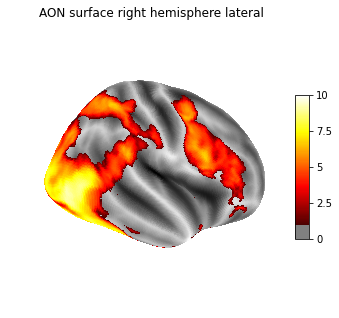

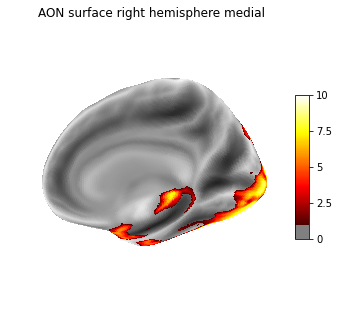

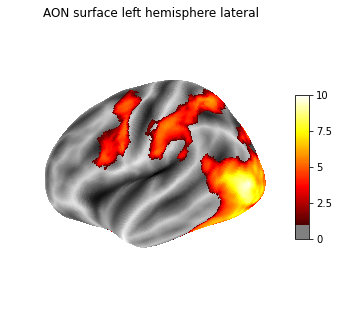

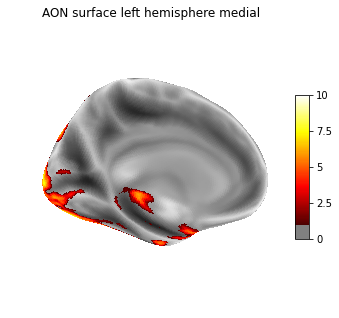

In [106]:
# sample the stat maps around freesurfer mesh
aon_texture_r = surface.vol_to_surf(aon_thresholded_map, fsaverage.pial_right)
aon_texture_l = surface.vol_to_surf(aon_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
aon_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, aon_texture_r, hemi='right', view='lateral',
    title='AON surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_right,
)
aon_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_right, aon_texture_r, hemi='right', view='medial',
    title='AON surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_right,
)

# left hemi
aon_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, aon_texture_l, hemi='left', view='lateral',
    title='AON surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_left,
)
aon_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_left, aon_texture_l, hemi='left', view='medial',
    title='AON surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_left,
)

# show the figures
aon_texture_fig_right_lateral.show()
aon_texture_fig_right_medial.show()
aon_texture_fig_left_lateral.show()
aon_texture_fig_left_medial.show()

# save the figures locally
aon_texture_fig_right_lateral.savefig(plot_dir / 'aon_texture_fig_right_lateral')
aon_texture_fig_right_medial.savefig(plot_dir / 'aon_texture_fig_right_medial')
aon_texture_fig_left_lateral.savefig(plot_dir / 'aon_texture_fig_left_lateral')
aon_texture_fig_left_medial.savefig(plot_dir / 'aon_texture_fig_left_medial')

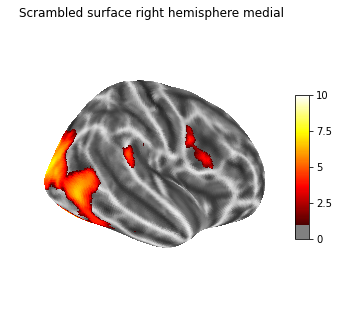

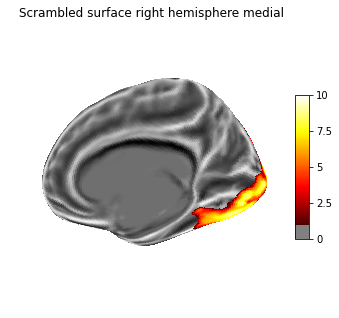

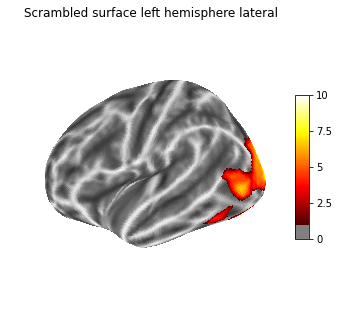

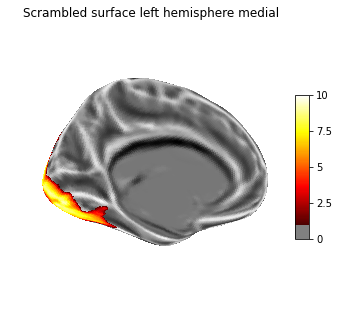

In [68]:
# sample the stat maps around freesurfer mesh
scrambled_texture_r = surface.vol_to_surf(scrambled_thresholded_map, fsaverage.pial_right)
scrambled_texture_l = surface.vol_to_surf(scrambled_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
scrambled_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, scrambled_texture_r, hemi='right', view='lateral',
    title='Scrambled surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
scrambled_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_right, scrambled_texture_r, hemi='right', view='medial',
    title='Scrambled surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
# left hemi
scrambled_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, scrambled_texture_l, hemi='left', view='lateral',
    title='Scrambled surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
scrambled_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_left, scrambled_texture_l, hemi='left', view='medial',
    title='Scrambled surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
scrambled_texture_fig_right_lateral.show()
scrambled_texture_fig_right_medial.show()
scrambled_texture_fig_left_lateral.show()
scrambled_texture_fig_left_medial.show()

# save the figures locally
scrambled_texture_fig_right_lateral.savefig(plot_dir / 'scrambled_texture_fig_right_lateral')
scrambled_texture_fig_right_medial.savefig(plot_dir / 'scrambled_texture_fig_right_medial')
scrambled_texture_fig_left_lateral.savefig(plot_dir / 'scrambled_texture_fig_left_lateral')
scrambled_texture_fig_left_medial.savefig(plot_dir / 'scrambled_texture_fig_left_medial')

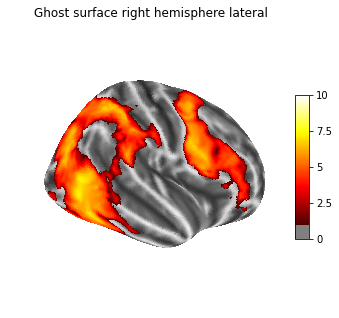

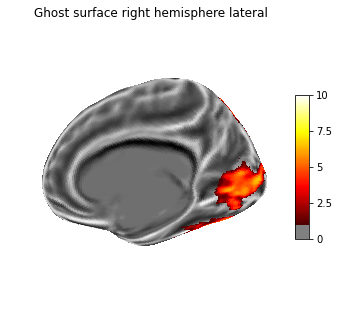

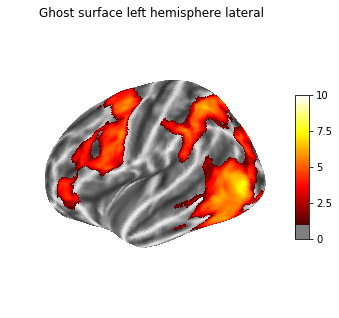

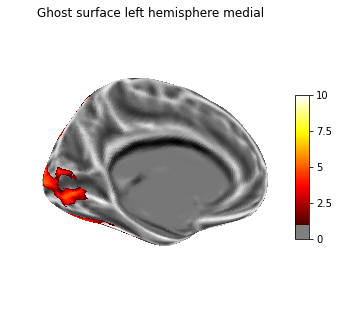

In [69]:
# sample the stat maps around freesurfer mesh
ghost_texture_r = surface.vol_to_surf(ghost_thresholded_map, fsaverage.pial_right)
ghost_texture_l = surface.vol_to_surf(ghost_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
ghost_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, ghost_texture_r, hemi='right', view='lateral', 
    title='Ghost surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
ghost_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_right, ghost_texture_r, hemi='right', view='medial', 
    title='Ghost surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
# left hemi
ghost_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, ghost_texture_l, hemi='left', view='lateral',
    title='Ghost surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
ghost_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_left, ghost_texture_l, hemi='left', view='medial',
    title='Ghost surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
ghost_texture_fig_right_lateral.show()
ghost_texture_fig_right_medial.show()
ghost_texture_fig_left_lateral.show()
ghost_texture_fig_left_medial.show()

# save the figures locally
ghost_texture_fig_right_lateral.savefig(plot_dir / 'ghost_texture_fig_right_lateral')
ghost_texture_fig_right_medial.savefig(plot_dir / 'ghost_texture_fig_right_medial')
ghost_texture_fig_left_lateral.savefig(plot_dir / 'ghost_texture_fig_left_lateral')
ghost_texture_fig_left_medial.savefig(plot_dir / 'ghost_texture_fig_left_medial')

## Plot 2

1.	Transitive > Intransitive
2.	Intransitive > Transitive
3.	Human > Dog
3.	Dog > Human

Load thresholded images for plot 1

In [171]:
transitive_intransitive_thresholded_map = AON_second_level_dir / "transitive-intransitive_z_map_threshold.nii.gz"
intransitive_transitive_thresholded_map = AON_second_level_dir / "intransitive-transitive_z_map_threshold.nii.gz"
human_dog_thresholded_map = AON_second_level_dir / "human-dog_z_map_threshold.nii.gz"
dog_human_thresholded_map = AON_second_level_dir / "dog-human_z_map_threshold.nii.gz"

All action observation > baseline

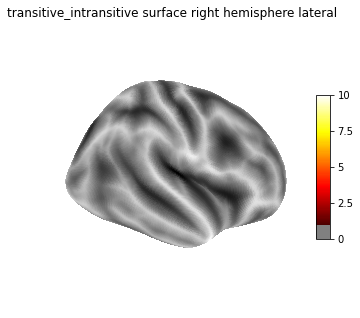

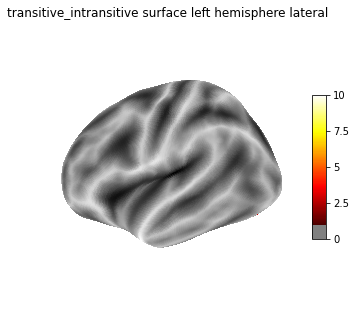

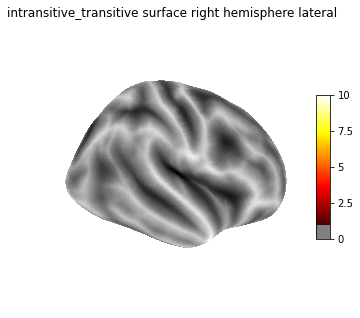

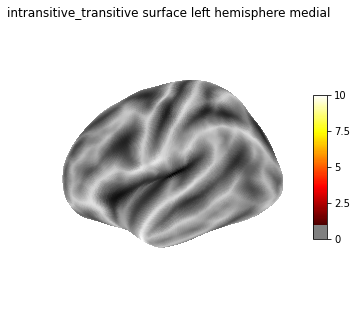

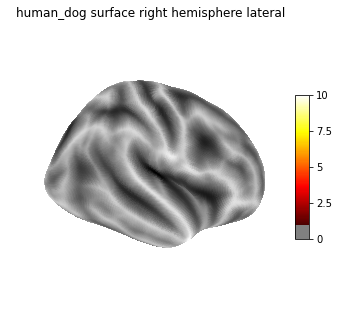

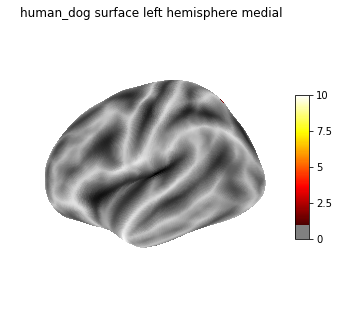

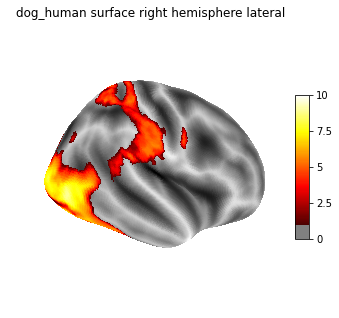

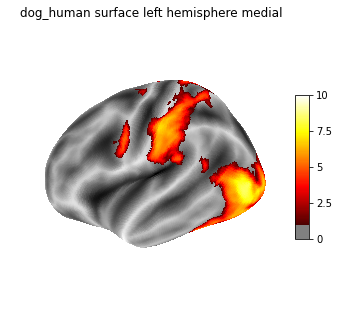

In [174]:
# sample the stat maps around freesurfer mesh
transitive_intransitive_r = surface.vol_to_surf(transitive_intransitive_thresholded_map, fsaverage.pial_right)
transitive_intransitive_l = surface.vol_to_surf(transitive_intransitive_thresholded_map, fsaverage.pial_left)
intransitive_transitive_r = surface.vol_to_surf(intransitive_transitive_thresholded_map, fsaverage.pial_right)
intransitive_transitive_l = surface.vol_to_surf(intransitive_transitive_thresholded_map, fsaverage.pial_left)
human_dog_r = surface.vol_to_surf(human_dog_thresholded_map, fsaverage.pial_right)
human_dog_l = surface.vol_to_surf(human_dog_thresholded_map, fsaverage.pial_left)
dog_human_r = surface.vol_to_surf(dog_human_thresholded_map, fsaverage.pial_right)
dog_human_l = surface.vol_to_surf(dog_human_thresholded_map, fsaverage.pial_left)

## create the plots

# transitive-intransitive
transitive_intransitive_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, transitive_intransitive_r, hemi='right', view='lateral',
    title='transitive_intransitive surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_right,
)
transitive_intransitive_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, transitive_intransitive_l, hemi='left', view='lateral',
    title='transitive_intransitive surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_left,
)
# intransitive-transitive
intransitive_transitive_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, intransitive_transitive_r, hemi='right', view='lateral',
    title='intransitive_transitive surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_right,
)
intransitive_transitive_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, intransitive_transitive_l, hemi='left', view='lateral',
    title='intransitive_transitive surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_left,
)
# human-dog
human_dog_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, human_dog_r, hemi='right', view='lateral',
    title='human_dog surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_right,
)
human_dog_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, human_dog_l, hemi='left', view='lateral',
    title='human_dog surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_left,
)
# dog-human
dog_human_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, dog_human_r, hemi='right', view='lateral',
    title='dog_human surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_right,
)
dog_human_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, dog_human_l, hemi='left', view='lateral',
    title='dog_human surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=sulc_left,
)


# show the figures
transitive_intransitive_texture_fig_right_lateral.show()
transitive_intransitive_texture_fig_left_lateral.show()
intransitive_transitive_texture_fig_right_lateral.show()
intransitive_transitive_texture_fig_left_lateral.show()
human_dog_texture_fig_right_lateral.show()
human_dog_texture_fig_left_lateral.show()
dog_human_texture_fig_right_lateral.show()
dog_human_texture_fig_left_lateral.show()

# save the figures locally
transitive_intransitive_texture_fig_right_lateral.savefig(plot_dir / 'transitive_intransitive_texture_fig_right_lateral')
transitive_intransitive_texture_fig_left_lateral.savefig(plot_dir / 'transitive_intransitive_texture_fig_left_lateral')
intransitive_transitive_texture_fig_right_lateral.savefig(plot_dir / 'intransitive_transitive_texture_fig_right_lateral')
intransitive_transitive_texture_fig_left_lateral.savefig(plot_dir / 'intransitive_transitive_texture_fig_left_lateral')
human_dog_texture_fig_right_lateral.savefig(plot_dir / 'human_dog_texture_fig_right_lateral')
human_dog_texture_fig_left_lateral.savefig(plot_dir / 'human_dog_texture_fig_left_lateral')
dog_human_texture_fig_right_lateral.savefig(plot_dir / 'dog_human_texture_fig_right_lateral')
dog_human_texture_fig_left_lateral.savefig(plot_dir / 'dog_human_texture_fig_left_lateral')

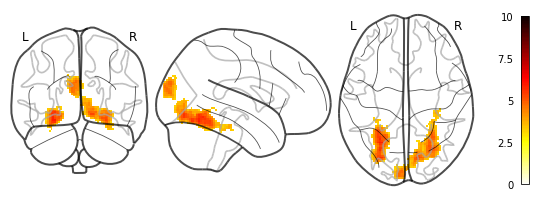

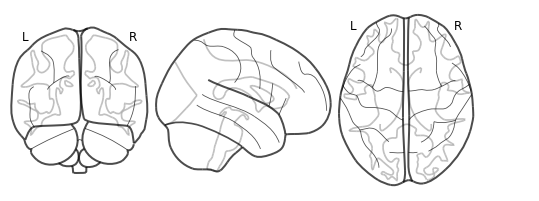

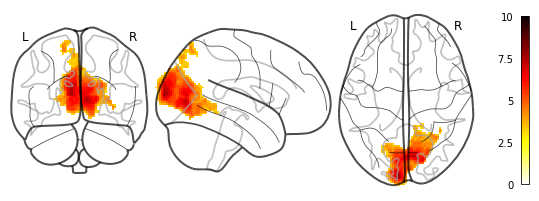

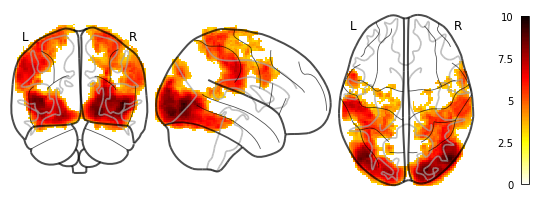

In [178]:
# create z view images

# transitive-intransitive
transitive_intransitive_glass_brain = plotting.plot_glass_brain(transitive_intransitive_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
transitive_intransitive_glass_brain.savefig(plot_dir / 'transitive_intransitive_glass_brain')

# intransitive-transitive
intransitive_transitive_glass_brain = plotting.plot_glass_brain(intransitive_transitive_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
intransitive_transitive_glass_brain.savefig(plot_dir / 'intransitive_transitive_glass_brain')

# human-dog
human_dog_glass_brain = plotting.plot_glass_brain(human_dog_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
human_dog_glass_brain.savefig(plot_dir / 'human-dog_glass_brain')

# dog-human
dog_human_glass_brain = plotting.plot_glass_brain(dog_human_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
dog_human_glass_brain.savefig(plot_dir / 'dog_human_glass_brain')

## Plot 4

1.	All action > baseline 
2.	All action > baseline
3. Conjunction mask
4. Anatomical ROI mask 

Load images for plot 4

In [120]:
aon_thresholded_map = AON_second_level_dir / "AON-baseline_z_map_threshold.nii.gz"
action_thresholded_map = action_second_level_dir / "action-baseline_z_map_threshold.nii.gz"
aon_mask = f"{masks_templates_dir}/AON_mask.nii.gz"
action_mask = f"{masks_templates_dir}/action_mask.nii.gz"
conjunction_mask = f"{masks_templates_dir}/conjunction_mask.nii.gz"
anat_roi_mask = f"{roi_dir}/anat_roi_mask.nii.gz"

All action > baseline

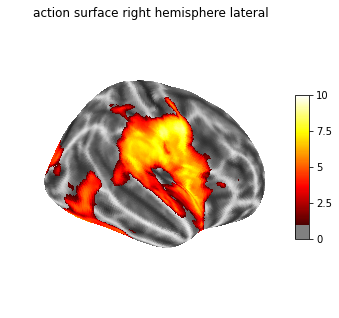

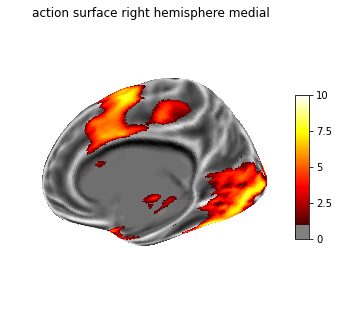

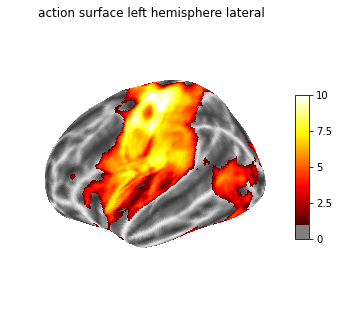

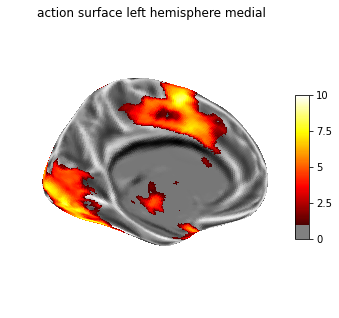

In [107]:
# sample the stat maps around freesurfer mesh
action_texture_r = surface.vol_to_surf(action_thresholded_map, fsaverage.pial_right)
action_texture_l = surface.vol_to_surf(action_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
action_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_right, action_texture_r, hemi='right', view='lateral',
    title='action surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
action_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_right, action_texture_r, hemi='right', view='medial',
    title='action surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)

# left hemi
action_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.infl_left, action_texture_l, hemi='left', view='lateral',
    title='action surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
action_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.infl_left, action_texture_l, hemi='left', view='medial',
    title='action surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
action_texture_fig_right_lateral.show()
action_texture_fig_right_medial.show()
action_texture_fig_left_lateral.show()
action_texture_fig_left_medial.show()

# save the figures locally
action_texture_fig_right_lateral.savefig(plot_dir / 'action_texture_fig_right_lateral')
action_texture_fig_right_medial.savefig(plot_dir / 'action_texture_fig_right_medial')
action_texture_fig_left_lateral.savefig(plot_dir / 'action_texture_fig_left_lateral')
action_texture_fig_left_medial.savefig(plot_dir / 'action_texture_fig_left_medial')

Conjunction action observation * action execution

I multiply the action mask by two, so that instead of one its values are 0,2 (still binary). 

In [72]:
action_mask_two = math_img("img*2", img=action_mask)

In [81]:
# quick manipulation check
action_mask_two_labels = np.unique(action_mask_two.get_fdata())
n_values_act = action_mask_two_labels.size

print(f"There are {n_values_act} different values in the mask! Check here if the mask is binary (should be 0 and 2): {action_mask_two_labels}")

There are 2 different values in the mask! Check here if the mask is binary (should be 0 and 2): [0. 2.]


Now add up the action_mask_two and the aon_mask.

This results in a final mask with the following values:
- 0 = no significant activation
- 1 = significant AON activation
- 2 = significant action activation
- 3 = overlap between signficant action and AON activation

In [76]:
conjuction_plot_mask = math_img("img1+img2", img1=aon_mask, img2=action_mask_two)

In [82]:
# quick manipulation check
conjuction_plot_mask_labels = np.unique(conjuction_plot_mask.get_fdata())
n_values_con = conjuction_plot_mask_labels.size

print(f"There are {n_values_con} different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): {conjuction_plot_mask_labels}")

There are 4 different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): [0. 1. 2. 3.]


/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


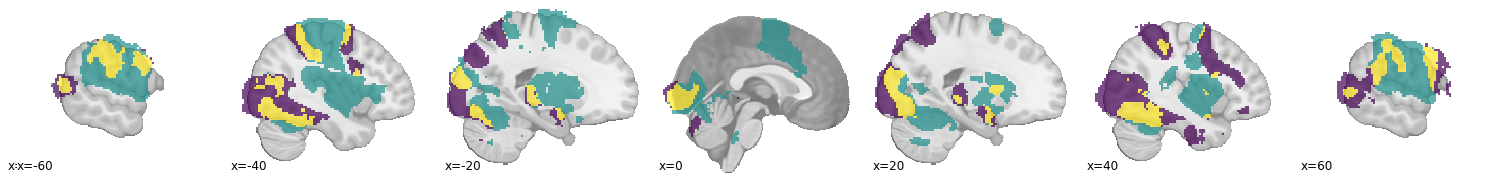

In [128]:
plotting.plot_roi(conjuction_plot_mask, display_mode = 'x', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


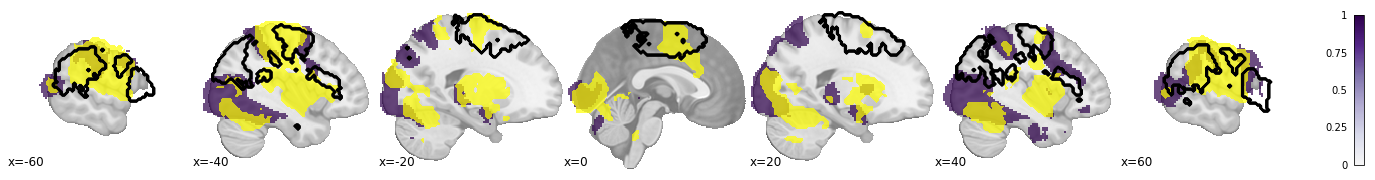

In [ ]:
# Visually overlay the action map on top of the action map
overlay_plot_x = plotting.plot_stat_map(aon_mask, draw_cross=False, display_mode = 'x', cut_coords=np.arange(-60,80,20), 
                                  bg_img = template, cmap="PuOr", black_bg = False, alpha=.7)
overlay_plot_x.add_contours(action_mask, filled=True, alpha=0.7, colors="yellow")
overlay_plot_x.add_contours(anat_roi_mask, filled=False, colors="k")

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


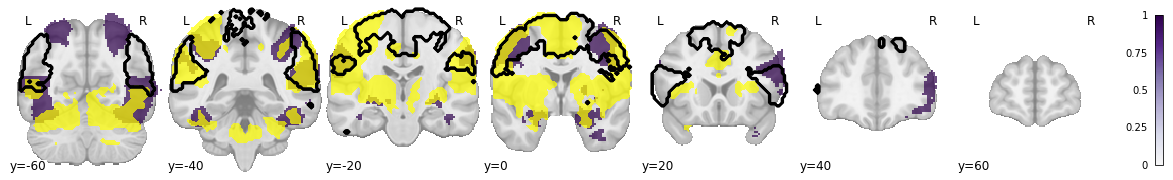

In [139]:
# Visually overlay the action map on top of the action map
overlay_plot_y = plotting.plot_stat_map(aon_mask, draw_cross=False, display_mode = 'y', cut_coords=np.arange(-60,80,20), 
                                  bg_img = template, cmap="PuOr", black_bg = False, alpha=.7)
overlay_plot_y.add_contours(action_mask, filled=True, alpha=0.7, colors="yellow")
overlay_plot_y.add_contours(anat_roi_mask, filled=False, colors="k")

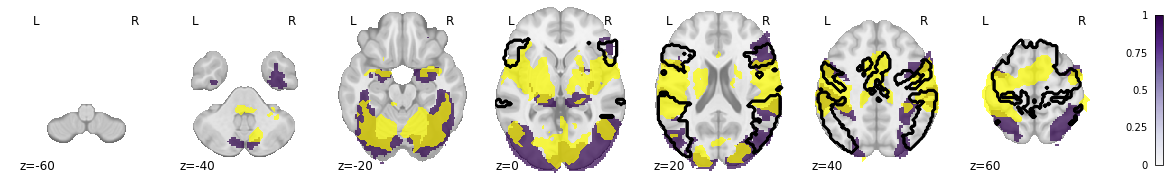

In [140]:
# Visually overlay the action map on top of the action map
overlay_plot_z = plotting.plot_stat_map(aon_mask, draw_cross=False, display_mode = 'z', cut_coords=np.arange(-60,80,20), 
                                  bg_img = template, cmap="PuOr", black_bg = False, alpha=.7)
overlay_plot_z.add_contours(action_mask, filled=True, alpha=0.7, colors="yellow")
overlay_plot_z.add_contours(anat_roi_mask, filled=False, colors="k")

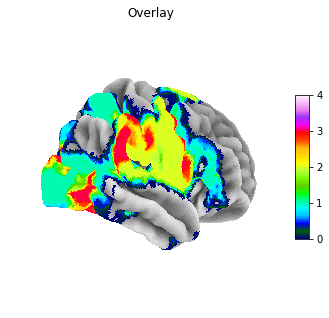

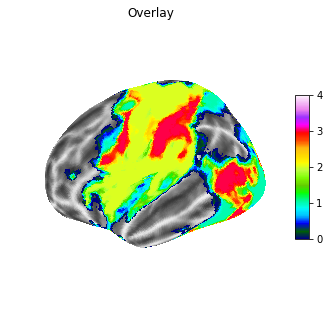

In [167]:
conjunction_texture_r = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_right)
conjunction_texture_l = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_left)

conjunction_texture_right = plotting.plot_surf_roi(fsaverage.infl_right, roi_map=conjunction_texture_r,
                       hemi='right', view='lateral', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay")
conjunction_texture_left = plotting.plot_surf_roi(fsaverage.infl_left, roi_map=conjunction_texture_l,
                       hemi='left', view='lateral', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay")

conjunction_texture_right.show()
conjunction_texture_left.show()

conjunction_texture_right.savefig(plot_dir / 'conjunction_texture_fig_right_lateral')
conjunction_texture_left.savefig(plot_dir / 'conjunction_texture_fig_left_lateral')

**Anatomical ROIs**

- Left IPL AON mask
- Right IPL AON mask
- Left IFG AON mask
- Right IFG AON mask
- Left PM AON mask
- Right PM AON mask
- Left M1 AON mask

In [148]:
# load them all
left_ipl_mask = f"{roi_dir}/left_inferior_parietal_lobule_mask.nii.gz"
right_ipl_mask = f"{roi_dir}/right_inferior_parietal_lobule_mask.nii.gz"

left_ifg_mask = f"{roi_dir}/left_inferior_frontal_gyrus_mask.nii.gz"
right_ifg_mask = f"{roi_dir}/right_inferior_frontal_gyrus_mask.nii.gz"

left_pm_mask = f"{roi_dir}/left_premotor_cortex_mask.nii.gz"
right_pm_mask = f"{roi_dir}/right_premotor_cortex_mask.nii.gz"

left_m1_mask = f"{roi_dir}/left_primary_motor_cortex_mask.nii.gz"
right_m1_mask = f"{roi_dir}/right_primary_motor_cortex_mask.nii.gz"

Combine them 
- IPL = 1
- IFG = 2
- PM = 3
- M1 = 4

In [149]:
labels = {1:"IPL",
          2:"IFG",
          3:"PM",
          4:"M1"}

In [150]:
ipl_total = math_img("img1+img2", img1=left_ipl_mask, img2=right_ipl_mask)
ifg_total = math_img("img1+img2", img1=left_ifg_mask, img2=right_ifg_mask)
ifg_total_two = math_img("img*2", img=ifg_total)
pm_total = math_img("img1+img2", img1=left_pm_mask, img2=right_pm_mask)
pm_total_three = math_img("img*3", img = pm_total)
m1_total = math_img("img1+img2", img1=left_m1_mask, img2=right_m1_mask)
m1_total_four = math_img("img*4", img = m1_total)

# and add them up
roi_atlas = math_img("img1+img2+img3+img4", img1=ipl_total, img2=ifg_total_two, img3=pm_total_three, img4=m1_total_four)

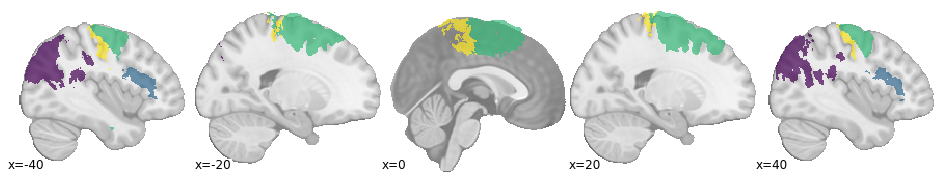

In [158]:
# plot the harvard-oxford atlas
roi_plot = plotting.plot_roi(roi_atlas, display_mode = 'x', cut_coords=np.arange(-40,60,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="viridis")

In [161]:
# save the stuff
roi_atlas_path = f"{roi_dir}/roi_atlas.nii.gz"
roi_atlas.to_filename(roi_atlas_path)
roi_plot.savefig(plot_dir / 'roi_atlas')

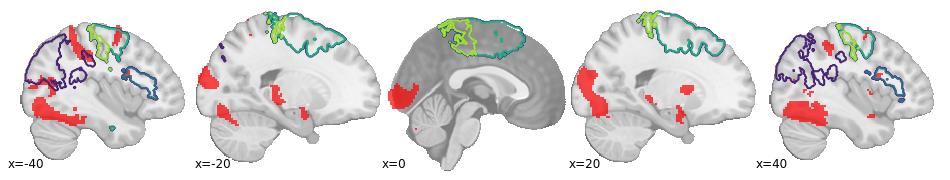

In [170]:
# same but for the conjunction plot
conjunction_plot = plotting.plot_roi(conjunction_mask, display_mode = 'x', cut_coords=np.arange(-40,60,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="autumn")
conjunction_plot.add_contours(roi_atlas)
conjunction_plot.savefig(plot_dir / 'conjunction_plot')